Here we have Airline passanger data form past some years.Here I will throw light on the concepts of time series data.This kernel is work in process and I will be updating the kernel in coming days.

## Input

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas import read_csv


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/5) Recurrent Neural Network/international-airline-passengers.csv
/kaggle/input/5) Recurrent Neural Network/lstm.jpg
/kaggle/input/5) Recurrent Neural Network/Recurrent Neural Network (RNN).ipynb
/kaggle/input/5) Recurrent Neural Network/temporal loop.jpg
/kaggle/input/5) Recurrent Neural Network/many to many.jpg
/kaggle/input/5) Recurrent Neural Network/Stock_Price_Train.csv
/kaggle/input/5) Recurrent Neural Network/Stock_Price_Test.csv
/kaggle/input/5) Recurrent Neural Network/many to one.jpg
/kaggle/input/5) Recurrent Neural Network/new world image.jpg
/kaggle/input/5) Recurrent Neural Network/one to many.jpg
/kaggle/input/5) Recurrent Neural Network/.ipynb_checkpoints/Recurrent Neural Network (RNN)-checkpoint.ipynb
/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv
/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/rnn.py
/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/Google_Stock_Price

In [2]:
df = pd.read_csv('/kaggle/input/5) Recurrent Neural Network/international-airline-passengers.csv',skipfooter=5,index_col="Month")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym

In [3]:
df.tail()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461


### Renaming columns

In [4]:
df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'Passengers'}, inplace=True)

### Dropping missing values if any

In [5]:
df.dropna(inplace=True)

### Converting index to Datetime

In [6]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10'],
      dtype='object', name='Month', length=142)

We can see that the dates are string which need to be converted to datetime.

In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01'],
              dtype='datetime64[ns]', name='Month', length=142, freq=None)

We have converted the index to Datetime Index.

### Simple Moving Average

In [9]:
df['6-month-SMA'] = df['Passengers'].rolling(window=6).mean()
df['12-month-SMA'] = df['Passengers'].rolling(window=12).mean()

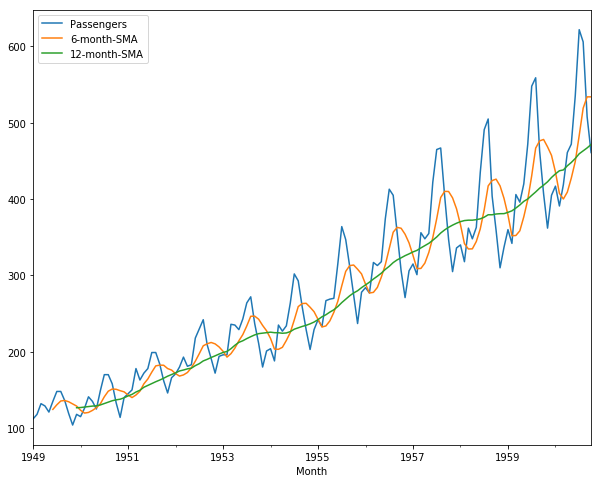

In [10]:
df.plot(figsize=(10,8));

Some of the weakness of Simple moving average 

1.Smaller window will lead to more noise 

2.It will always lag by the size of the Window

3.It will never reach to full peak or valley of the data due to the averaging 

4.Does not really inform about possible future behaviour,all it really does is describe trends in your data

5.Extreme historical values can skew your SMA Significantly.

### Exponentially Weighted Moving Average (EWMA) 

It will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently by applying more weight to the more recent values.


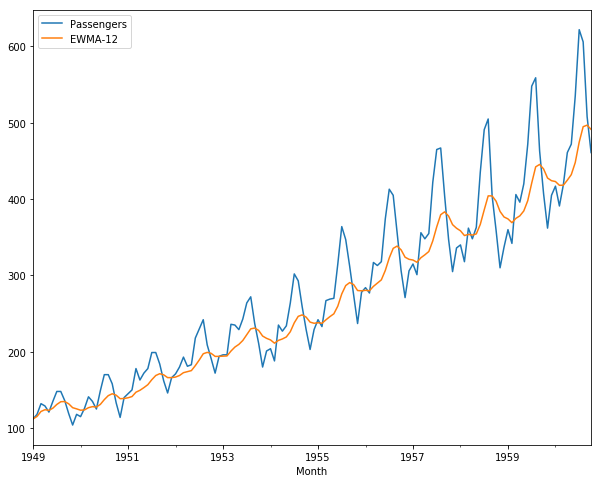

In [11]:
df['EWMA-12'] = df['Passengers'].ewm(span=12).mean()
df[['Passengers','EWMA-12']].plot(figsize=(10,8));

We can see that the Seasonality is more clear in the end of the plot.This is because we have weighed the values more towards the end.

### Error Trend Seasonality

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Passengers'],model='multiplicative')
result

#### Seasonal Component

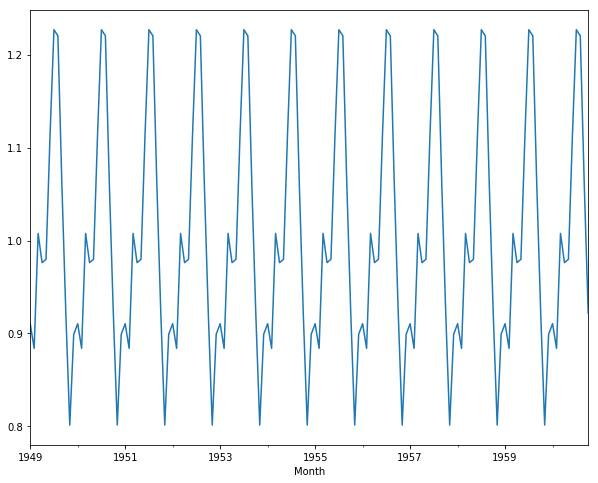

In [13]:
result.seasonal.plot(figsize=(10,8))

#### Trend

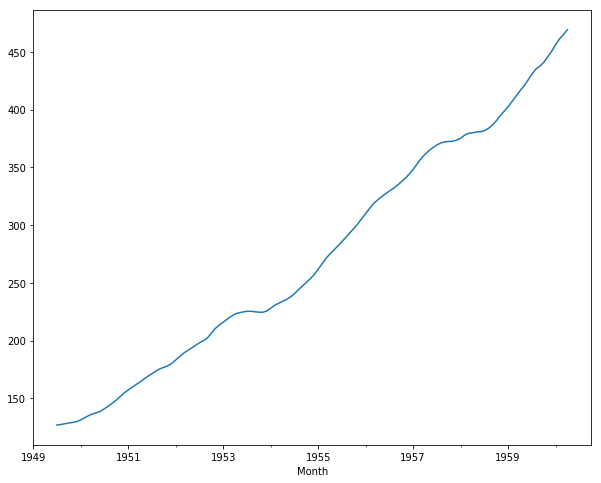

In [14]:
result.trend.plot(figsize=(10,8))

#### All Plots Together

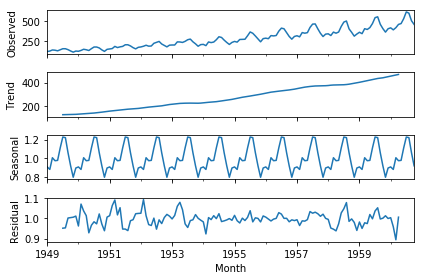

In [15]:
fig =result.plot()

So we have ploted trend,Seasonality and the Resudal component of the Curve.

#### ARIMA Model 

In [16]:
time_series = df['Passengers']

In [17]:
type(time_series)

pandas.core.series.Series

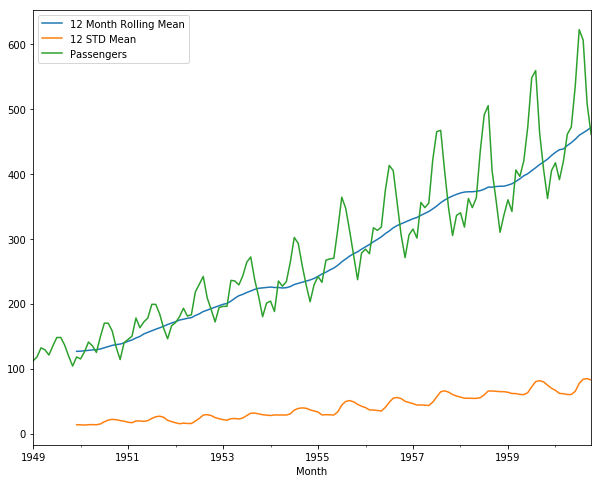

In [18]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
time_series.rolling(12).std().plot(label='12 STD Mean',figsize=(10,8))
time_series.plot()
plt.legend();

We can see that there is an upward trend shown by the Rolling average curve,This is also quite obvious to our eyes.From the standard deviation plot we will be able to see the years with major deviation or the outlier years>